In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pmdarima as pm
import time
import ast
from datetime import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('train.csv')
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")

Loading data file now, this could take a while depending on file size
Loading took 0.03 seconds


In [11]:
def get_season(month):
    if month in [2, 3, 4, 5]:  # ฤดูร้อน
        return 'Summer'
    elif month in [6, 7, 8, 9, 10]:  # ฤดูฝน
        return 'Rainy'
    else:  # ฤดูหนาว
        return 'Winter'

In [12]:
# เพิ่มคอลัมน์เดือนและฤดู
df['Month'] = df['num_id'] % 12
df['Season'] = df['Month'].apply(get_season)

In [13]:
df.head(12)

,num_id,y1,y2,y3,Month,Season
0,1,879878.00,52548712.45,1145963,1,Winter
1,2,892771.77,52977763.18,1029008,2,Summer
2,3,1234170.67,62610108.35,1195365,3,Summer
3,4,1424293.50,58400221.28,1370666,4,Summer
4,5,1615346.95,65722728.55,1685763,5,Summer
5,6,1416650.20,63202279.52,1491584,6,Rainy
6,7,1174163.01,64282647.26,1443365,7,Rainy
7,8,1025296.17,64579756.97,1362307,8,Rainy
8,9,990235.73,63245916.23,1380217,9,Rainy
9,10,1012290.55,63169908.32,1387459,10,Rainy


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num_id  114 non-null    int64  
 1   y1      114 non-null    float64
 2   y2      114 non-null    float64
 3   y3      114 non-null    int64  
 4   Month   114 non-null    int64  
 5   Season  114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


In [14]:
df_y1 = df[['num_id', 'y1','Season']].copy()
df_y2 = df[['num_id', 'y2','Season']].copy()
df_y3 = df[['num_id', 'y3','Season']].copy()

C:\Users\singk\AppData\Local\Temp\ipykernel_2692\1175308482.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


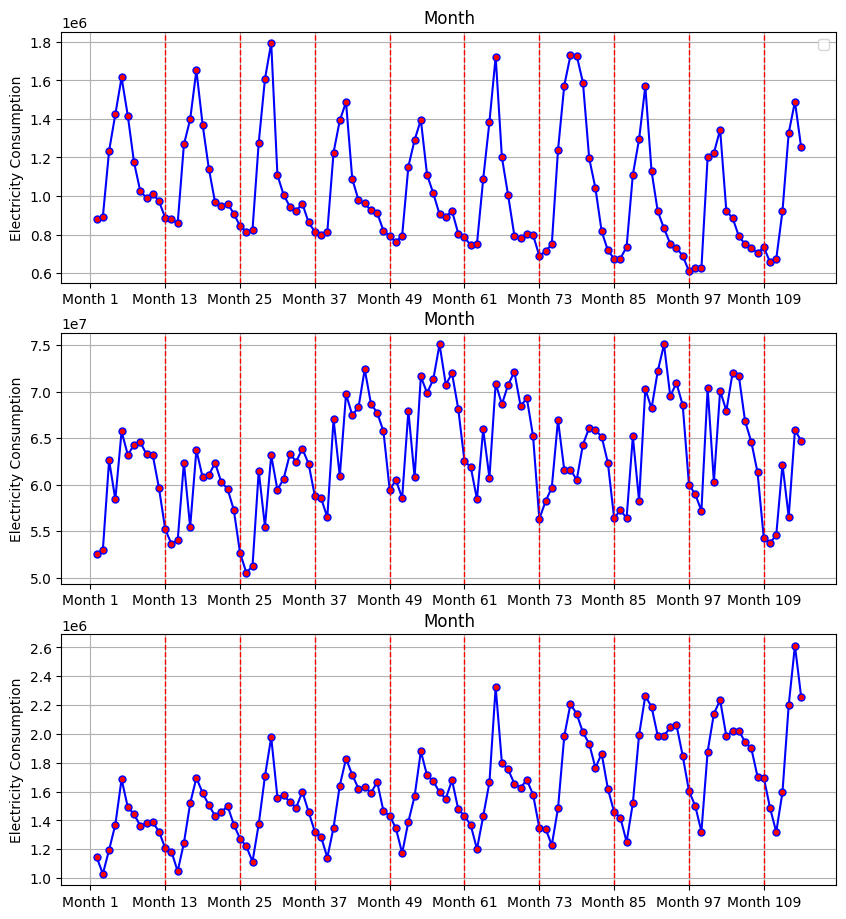

In [36]:
plt.figure(figsize=(10,15))

plt.subplot(4, 1, 1)
plt.plot(df_y1['num_id'], df_y1['y1'], marker='o',markersize=5,markerfacecolor='red', color='blue')
for i in range(12, 114, 12):
    plt.axvline(x=i, color='red', linestyle='--', linewidth=1)
plt.xticks(range(0, 115, 12), labels=[f'Month {i+1}' for i in range(0, 115, 12)])
plt.legend()
plt.ylabel('Electricity Consumption')
plt.title('Month')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(df_y2['num_id'], df_y2['y2'], marker='o',markersize=5,markerfacecolor='red', color='blue')
for i in range(12, 114, 12):
    plt.axvline(x=i, color='red', linestyle='--', linewidth=1)
plt.xticks(range(0, 115, 12), labels=[f'Month {i+1}' for i in range(0, 115, 12)])
plt.ylabel('Electricity Consumption')
plt.title('Month')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(df_y3['num_id'], df_y3['y3'], marker='o',markersize=5,markerfacecolor='red', color='blue')
for i in range(12, 114, 12):
    plt.axvline(x=i, color='red', linestyle='--', linewidth=1)
plt.xticks(range(0, 115, 12), labels=[f'Month {i+1}' for i in range(0, 115, 12)])
plt.ylabel('Electricity Consumption')
plt.title('Month')

plt.grid(True)
plt.show()

In [37]:
result_y1 = seasonal_decompose(df_y1['y1'], model='multiplicative', period=12)
result_y2 = seasonal_decompose(df_y2['y2'], model='multiplicative', period=12)
result_y3 = seasonal_decompose(df_y3['y3'], model='multiplicative', period=12)

trend_y1 = result_y1.trend.dropna()
seasonal_y1 = result_y1.seasonal.dropna()
residual_y1 = result_y1.resid.dropna()

trend_y2 = result_y2.trend.dropna()
seasonal_y2 = result_y2.seasonal.dropna()
residual_y2 = result_y2.resid.dropna()

trend_y3 = result_y3.trend.dropna()
seasonal_y3 = result_y3.seasonal.dropna()
residual_y3 = result_y3.resid.dropna()

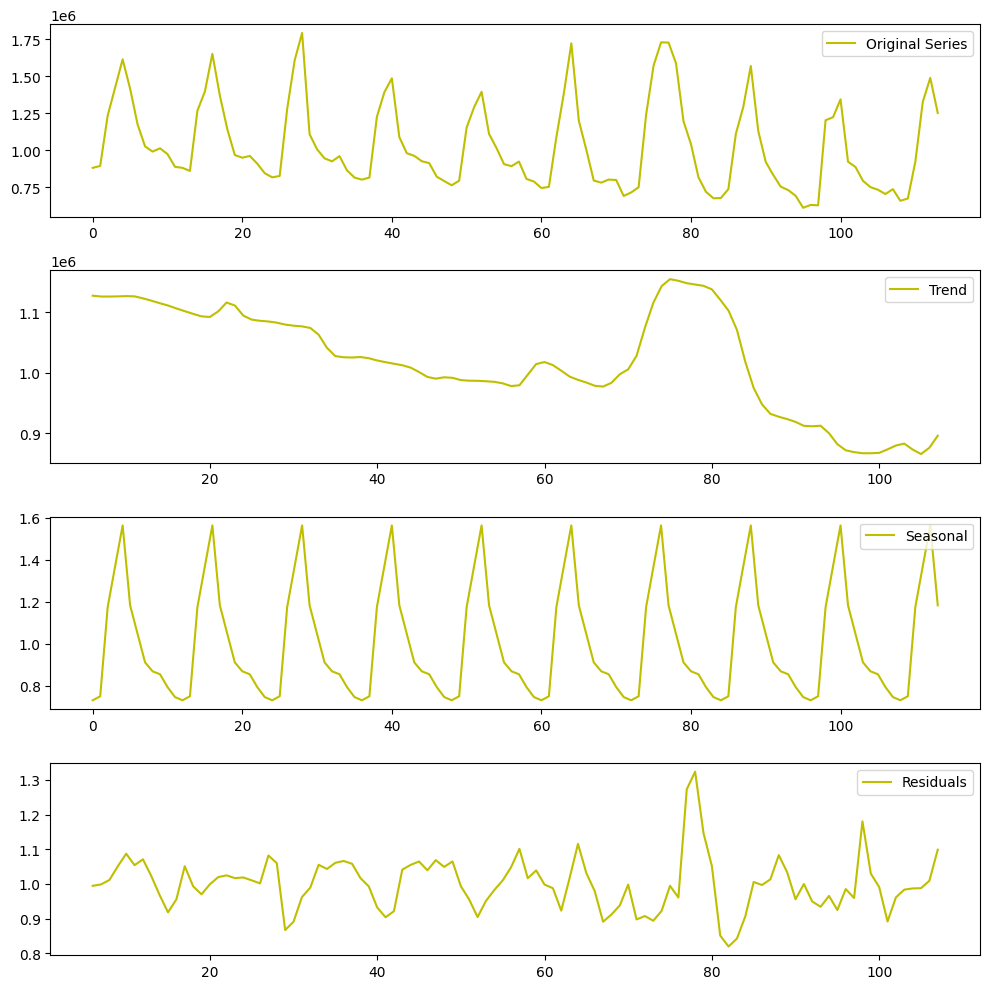

In [38]:
# Plot the decomposed components
plt.figure(figsize=(10,10))
plt.subplot(4, 1, 1)
plt.plot(df_y1['y1'],'y', label='Original Series')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend_y1,'y', label='Trend')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal_y1,'y', label='Seasonal')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual_y1, 'y' ,label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

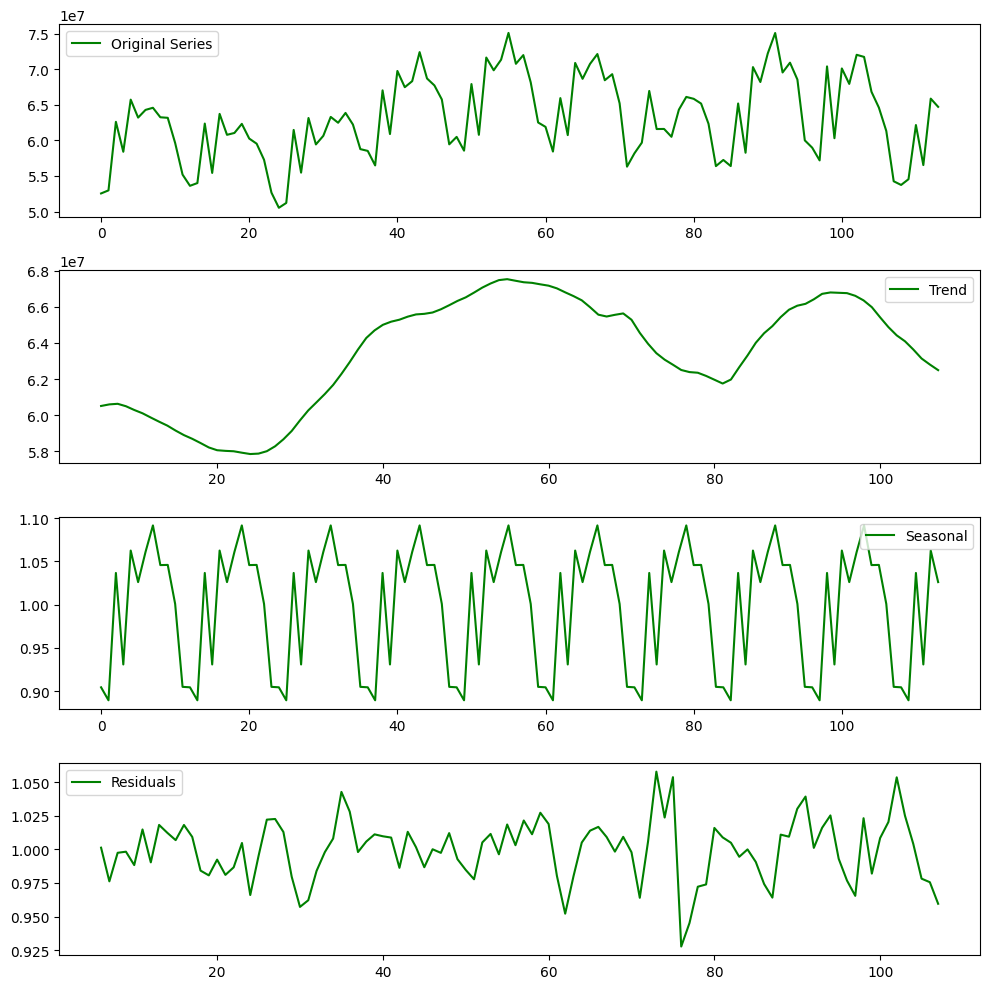

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(4, 1, 1)
plt.plot(df_y2['y2'],'g', label='Original Series')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend_y2,'g', label='Trend')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal_y2,'g', label='Seasonal')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual_y2, 'g' ,label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

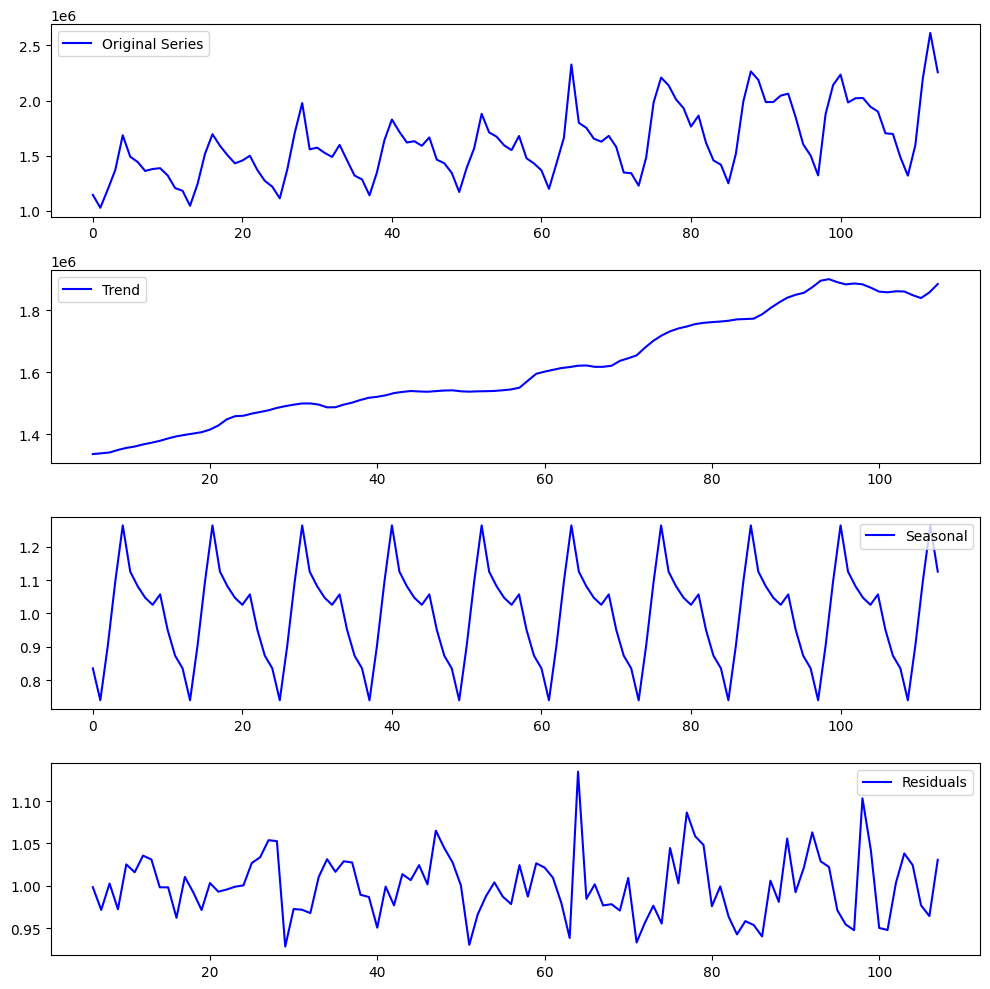

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(4, 1, 1)
plt.plot(df_y3['y3'],'b', label='Original Series')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend_y3,'b', label='Trend')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonal_y3,'b', label='Seasonal')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual_y3, 'b' ,label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
df

,num_id,y1,y2,y3,Month,Season
0,1,879878.00,52548712.45,1145963,1,Winter
1,2,892771.77,52977763.18,1029008,2,Summer
2,3,1234170.67,62610108.35,1195365,3,Summer
3,4,1424293.50,58400221.28,1370666,4,Summer
4,5,1615346.95,65722728.55,1685763,5,Summer
...,...,...,...,...,...,...
109,110,672043.59,54548603.50,1320012,2,Summer
110,111,920858.85,62154279.40,1594956,3,Summer
111,112,1327191.57,56532717.69,2199097,4,Summer
112,113,1489796.99,65864569.09,2612477,5,Summer


In [16]:
SARIMAX_model = pm.auto_arima(df_y1[['y1']], exogenous=df[['Month','Season']],
                           start_p=1, start_q=1,
                           test='adf',  # ใช้ ADF test เพื่อหา d
                           max_p=3, max_q=3, m=12,  # m คือ seasonality (12 สำหรับข้อมูลรายเดือน)
                           start_P=0, seasonal=True,
                           d=None, D=1,  # ให้ auto_arima ค้นหา d ที่เหมาะสม
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# ดูค่าที่ auto_arima คำนวณได้
SARIMAX_model.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [44]:
SARIMAX_model = pm.auto_arima(df_y2[['y2']], exogenous=df[['num_id']],
                           start_p=1, start_q=1,
                           test='adf',  # ใช้ ADF test เพื่อหา d
                           max_p=3, max_q=3, m=12,  # m คือ seasonality (12 สำหรับข้อมูลรายเดือน)
                           start_P=0, seasonal=True,
                           d=None, D=1,  # ให้ auto_arima ค้นหา d ที่เหมาะสม
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# ดูค่าที่ auto_arima คำนวณได้
SARIMAX_model.summary()

ValueError: key must be a string in one in {'kpss': <class 'pmdarima.arima.stationarity.KPSSTest'>, 'adf': <class 'pmdarima.arima.stationarity.ADFTest'>, 'pp': <class 'pmdarima.arima.stationarity.PPTest'>}, but got 'MAPE'

In [16]:
SARIMAX_model = pm.auto_arima(df_y3[['y3']], exogenous=df[['num_id']],
                           start_p=1, start_q=1,
                           test='adf',  # ใช้ ADF test เพื่อหา d
                           max_p=3, max_q=3, m=12,  # m คือ seasonality (12 สำหรับข้อมูลรายเดือน)
                           start_P=0, seasonal=True,
                           d=None, D=1,  # ให้ auto_arima ค้นหา d ที่เหมาะสม
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# ดูค่าที่ auto_arima คำนวณได้
SARIMAX_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2658.171, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2681.264, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2664.860, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2658.339, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2674.571, Time=0.07 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2658.926, Time=0.20 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2658.550, Time=0.39 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2664.297, Time=0.15 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2660.381, Time=0.61 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2659.844, Time=0.07 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2660.095, Time=0.22 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2660.448, Time=0.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2668.588, Time=0.05 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2659.334, Time=0.15 sec
 ARIMA(2,1,0)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1325.086
Date:                            Sun, 22 Sep 2024   AIC                           2658.171
Time:                                    13:27:53   BIC                           2668.632
Sample:                                         0   HQIC                          2662.406
                                            - 114                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4175      0.320      1.306      0.191      -0.209       1.044
ma.L1         -0.6316      0.299     -2.109      0.035      -1.219      -0.045
ma.S.L12      -0.4289      0.063     -6.773      0.000      -0.553      -0.305
sigma2       1.51e+10   1.52e-11   9.94e+20      0.000    1.51e+10    1.51e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.67   Jarque-Bera (JB):                17.25
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.49
Prob(H) (two-sided):                  0.53   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+37. Standard errors may be unstable.
"""

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model_y1 = SARIMAX(df_y1['y1'], order=(3, 1, 0), seasonal_order=(0, 1, 1, 12))
model_fit_y1 = model_y1.fit(disp=0)

model_y2 = SARIMAX(df_y2['y2'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit_y2 = model_y2.fit(disp=0)

model_y3 = SARIMAX(df_y3['y3'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit_y3 = model_y3.fit(disp=0)

In [19]:
n = 12

In [20]:
prediction_y1 = model_fit_y1.forecast(steps=n)
prediction_y2 = model_fit_y2.forecast(steps=n)
prediction_y3 = model_fit_y3.forecast(steps=n)

C:\Users\singk\AppData\Local\Temp\ipykernel_2692\999298846.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


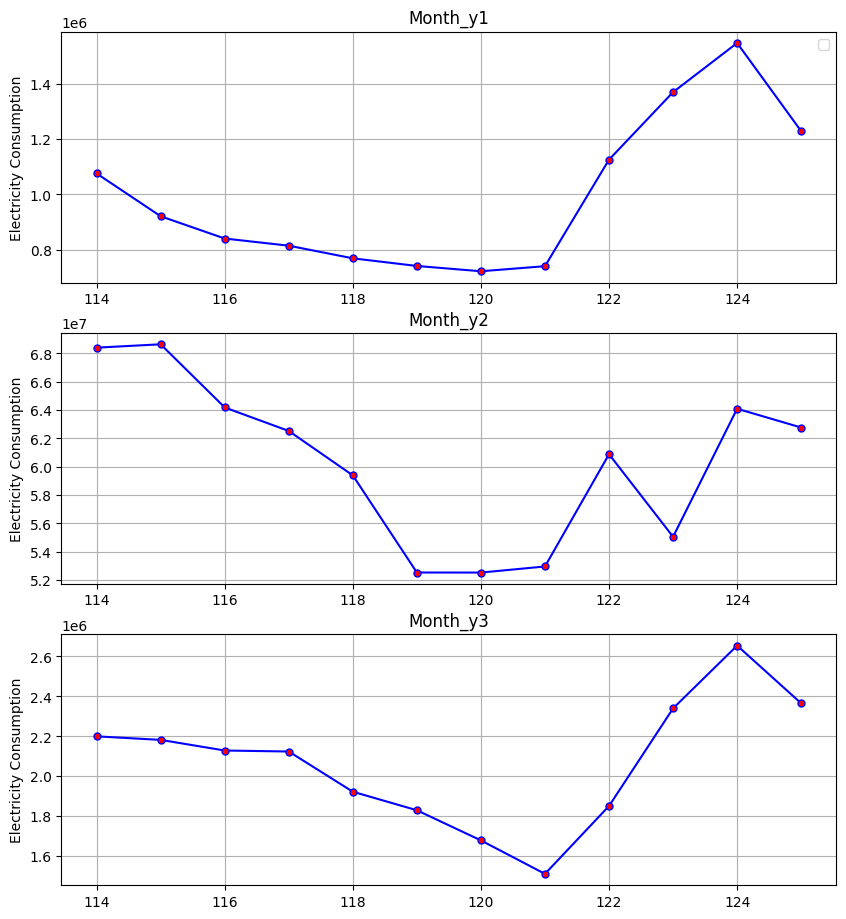

In [21]:
plt.figure(figsize=(10,15))

plt.subplot(4, 1, 1)
plt.plot(prediction_y1, marker='o',markersize=5,markerfacecolor='red', color='blue')
plt.legend()
plt.ylabel('Electricity Consumption')
plt.title('Month_y1')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(prediction_y2, marker='o',markersize=5,markerfacecolor='red', color='blue')

plt.ylabel('Electricity Consumption')
plt.title('Month_y2')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(prediction_y3, marker='o',markersize=5,markerfacecolor='red', color='blue')
plt.ylabel('Electricity Consumption')
plt.title('Month_y3')

plt.grid(True)
plt.show()

In [22]:
prediction_y1_np=np.array([prediction_y1])
prediction_y2_np=np.array([prediction_y2])
prediction_y3_np=np.array([prediction_y3])

In [24]:
prediction_y1_np

array([[1075408.02556859,  920856.40810332,  840445.68930123,
         814592.2971091 ,  768983.0627675 ,  741394.9003985 ,
         722276.53186141,  740610.61167443, 1125368.85466459,
        1369119.91874951, 1546602.73192892, 1228143.97611363]])

In [25]:
prediction_y2_np

array([[68411159.04567334, 68647473.18721746, 64188749.27477235,
        62530534.23106191, 59395075.89195034, 52539616.23894843,
        52535986.2911273 , 52965501.02668623, 60888899.2838276 ,
        55061984.55948735, 64099384.75730389, 62771733.11310471]])

In [26]:
prediction_y3_np

array([[2199702.57518676, 2181982.66877136, 2128723.37884813,
        2123734.17940099, 1922162.82350493, 1829312.50476157,
        1678110.5818943 , 1510441.43643192, 1850629.27142997,
        2339917.63016031, 2654606.99183388, 2365334.55526824]])

In [27]:
np_original_data_y1 = np.array([[1075408.02487704,  920856.4074748 ,  840445.68843159,
         814592.2965233 ,  768983.06224825,  741394.89999856,
         722276.53116539,  740610.61096166, 1125368.85390143,
        1369119.91817959, 1546602.73133081, 1228143.9755702 ]])

np_original_data_y2 = np.array([[68411159.04942426, 68647473.19210781, 64188749.27637807,
        62530534.23297869, 59395075.89223542, 52539616.23333528,
        52535986.27714293, 52965501.01195336, 60888899.27478971,
        55061984.5451378 , 64099384.74801096, 62771733.10352517]])

np_original_data_y3 = np.array([[2199702.57528901, 2181982.66893638, 2128723.37905918,
        2123734.17966014, 1922162.82377717, 1829312.50500502,
        1678110.58217821, 1510441.43672014, 1850629.27172219,
        2339917.63040086, 2654606.99204683, 2365334.55552019]])

# Flatten the arrays to 1D
np_original_data_y1 = np_original_data_y1.flatten()
np_original_data_y2 = np_original_data_y2.flatten()
np_original_data_y3 = np_original_data_y3.flatten()

# Combine the data from the three arrays
combined_data = np.concatenate([np_original_data_y1, np_original_data_y2, np_original_data_y3])

# Create an id array from 1 to the length of combined_data
id_array = np.arange(1, len(combined_data) + 1)

# Create a DataFrame
df = pd.DataFrame({
    'id': id_array,
    'Predict': combined_data
})

# Specify the CSV file name
csv_file = 'predictions_1.csv'  # Change this to your desired file name

# Save to CSV
df.to_csv(csv_file, index=False)